# MAKE DASHBOARD DATA
## Weather Company Data Limited Edition: Sales Prediction using The Weather Company Data

### Data Disclaimer

The weather and business input data provided in this Accelerator is simulated data, designed to illustrate how to solve a common business problem. You are not permitted to utilize the simulated data contained in the Accelerator outside of this Accelerator or the Sample Materials contained within it.

### Copyright

This project contains Sample Materials, provided under license. <br>
Licensed Materials - Property of IBM. <br>
© Copyright IBM Corp. 2020. All Rights Reserved. <br>
US Government Users Restricted Rights - Use, duplication or disclosure restricted by GSA ADP Schedule Contract with IBM Corp.

### Terms and Conditions

The terms under which you are licensing IBM Cloud Pak for Data also apply to your use of the Industry Accelerators. 
 
Before you use the Industry Accelerators, you must agree on these additional terms and conditions that are set forth here.
 
This information contains sample modules, exercises, and code samples (the code may be provided in source code form (“Source Code”)) (collectively “Sample Materials”).

### License
 
Subject to the terms herein, you may copy, modify, and distribute these Sample Materials within your enterprise only, for your internal use only; provided such use is within the limits of the license rights of the IBM agreement under which you are licensing IBM Cloud Pak for Data.
 
The Industry Accelerators might include applicable third-party licenses. Review the third-party licenses before you use any of the Industry Accelerators. You can find the third-party licenses that apply to each Sample Material in the notices.txt file that is included with each Sample Material.

### Code Security
 
Source Code may not be disclosed to any third parties for any reason without IBM’s prior written consent, and access must be limited to your employees who have a need to know. 
 
You have implemented and will maintain the technical and personnel focused security policies, procedures, and controls that are necessary to protect the Source Code against loss, alteration, unlawful forms of processing, unauthorized disclosure, and unauthorized access.
 
You will promptly (and in no event any later than 48 hours) notify IBM after becoming aware of any breach or other security incident that you know, or should reasonably suspect, affects or will affect the Source Code or IBM, and will provide IBM with reasonably requested information about such security incident and the status of any remediation and restoration activities.
 
You will not permit any Source Code to reside on servers located in the Russian Federation, the People’s Republic of China, or any territories worldwide in which the Russian Federation or People’s Republic of China claim sovereignty (collectively, “China or Russia”).  Company shall not permit anyone to access or use any such Source Code from or within China or Russia, and Company will not permit any development, testing, or other work to occur in China or Russia that would require such access or use.  Upon reasonable written notice, IBM may extend these restrictions to other countries that the United States government identifies as potential cyber security concerns.
IBM may request that you verify compliance with these Code Security obligations, and you agree to cooperate with IBM in that regard.

### General
 
Notwithstanding anything to the contrary, IBM PROVIDES THE SAMPLE MATERIALS ON AN "AS IS" BASIS AND IBM DISCLAIMS ALL WARRANTIES, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY IMPLIED WARRANTIES OR CONDITIONS OF MERCHANTABILITY, SATISFACTORY QUALITY, FITNESS FOR A PARTICULAR PURPOSE, TITLE, AND ANY WARRANTY OR CONDITION OF NON-INFRINGEMENT. IBM SHALL NOT BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY OR ECONOMIC CONSEQUENTIAL DAMAGES ARISING OUT OF THE USE OR OPERATION OF THE SAMPLE MATERIALS. IBM SHALL NOT BE LIABLE FOR LOSS OF, OR DAMAGE TO, DATA, OR FOR LOST PROFITS, BUSINESS REVENUE, GOODWILL, OR ANTICIPATED SAVINGS. IBM HAS NO OBLIGATION TO PROVIDE MAINTENANCE, SUPPORT, UPDATES, ENHANCEMENTS OR MODIFICATIONS TO THE SAMPLE MATERIALS.


## Introduction



This notebook computes dashboard data both to evaluate the predictive performance of models built using weather data and to explore any potential predictive relationships between the weather variables and the sales variable. Then it deploys the shiny assets in the file `sales-prediction-using-weather-company-data-dashboard.zip` to view the dashboard <br>

In the first part of the notebook :

The notebook loads unprocessed datasets (i.e., *fauxweather1.csv*, *fauxsales1.csv*, *fauxweather2.csv*, *fauxsales2.csv*) then uses the analysis specifications of a configuration file (i.e., *STEP 0.1*) to sequentially (a) transform the data into apt predictive modeling input data, (b) build then apply multiple predictive models, (c) compute datasets that tabulate some results of "build models" and "apply models" analyses in (b), and (d) save the computed datasets for a subsequent dashboard application. The datasets and configuration file have storage in the `/project_data/data_asset/` directory of the provided WML CP4D project. Likewise, all notebooks have storage in the `/project_data/notebook/` directory of the provided WML CP4D project.

In the second part we will:
- Programmatically get the ID's for the deployment space and model deployments that were created in the `build models` notebook.
- Store Shiny assets into the same deployment space.
- Deploy Shiny assets as an app and view the dashboard.

# STEP 0.1: Configure Analysis: Import Software Packages, Set Parameters, and Define Custom Functions

The following cells configure the analysis (i.e., import python software packages, set predefined variables (aka "parameters" aka "settings"), and define custom functions).

In [1]:
# ----------------------------------------------------------------------------------------------------------------------
# LOAD ANALYSIS CONFIGURATION
# ----------------------------------------------------------------------------------------------------------------------

# import "sys" library
import sys

# add project data path
if "/project_data/data_asset" not in sys.path:
    sys.path.insert(0, "/project_data/data_asset")

    
# import configuration information
from config import *

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# define data files
loadfile1 = "/project_data/data_asset/fauxsales1.csv"
loadfile2 = "/project_data/data_asset/fauxweather1.csv"
loadfile3 = "/project_data/data_asset/fauxsales2.csv"
loadfile4 = "/project_data/data_asset/fauxweather2.csv"

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 0.1: Configure Analysis' analysis")
    

DONE: 'STEP 0.1a: Import Software Packages' analysis
DONE: 'STEP 0.1b: Set Parameters' analysis
DONE: 'STEP 0.1c: Define Custom Functions' analysis
DONE: 'STEP 0.1: Configure Analysis' analysis


# STEP 1.1: Evaluate Data
Ideally and Prospectively, this substep simply computes statistics (typically descriptive stats) including analytics-focused or/and business-focused "quality metrics" of the data variables (columns).

In [2]:

# ----------------------------------------------------------------------------------------------------------------------
# ACTUAL
# ----------------------------------------------------------------------------------------------------------------------

#
list_loadfile = [loadfile1, loadfile2, loadfile3, loadfile4]

#
for loadfilenow in list_loadfile:
    
    # load data
#     df = pd.read_csv(loadfilenow, dtype=dict_dtypes, parse_dates=[name_columndatetime])
    df = pd.read_csv(loadfilenow)
    
    # compute columnar quality metrics (e.g., nunique, isnan, dtype, min, max, kurtosis): merged client data
    mydfdescribe(df)


# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.1: Evaluate Data' analysis")


,dtypes,nunique,count,percent_nan,percent_blank,percent_zero,percent_negative,min,max,kurtosis
date,int64,731,2193,0.0,0.0,0.000000,0.0,20160101,20171231,-1.982886
dateandtime,object,731,2193,0.0,0.0,0.000000,NaN,20160101 00:00:00,20171231 00:00:00,NaN
placeId,int64,3,2193,0.0,0.0,0.000000,0.0,78152,96468,-1.500685
placeName,object,3,2193,0.0,0.0,0.000000,NaN,place_078152,place_096468,NaN
postalcode,int64,3,2193,0.0,0.0,0.000000,0.0,65807,84123,-1.500685
countrycode,object,1,2193,0.0,0.0,0.000000,NaN,us,us,NaN
productname,object,1,2193,0.0,0.0,0.000000,NaN,thingamajig,thingamajig,NaN
producttype,object,1,2193,0.0,0.0,0.000000,NaN,categoryA,categoryA,NaN
discount,float64,3,2193,0.0,0.0,0.339717,0.0,0,0.2,-1.517852
closed,bool,2,2193,0.0,0.0,0.989056,0.0,False,True,86.586088


,dtypes,nunique,count,percent_nan,percent_blank,percent_zero,percent_negative,min,max,kurtosis
DewpointLocalAfternoonAvg,float64,1453,2193,0.0,0.0,0.0,0.011400,-1.563751e+01,7.292249e+01,-0.315214
DewpointLocalAfternoonMax,float64,397,2193,0.0,0.0,0.0,0.006384,-1.246042e+01,7.411958e+01,-0.365741
DewpointLocalAfternoonMin,float64,403,2193,0.0,0.0,0.0,0.002280,-1.058652e+01,8.157348e+01,-0.264868
DewpointLocalDayAvg,float64,1993,2193,0.0,0.0,0.0,0.001368,-2.442216e+00,8.548094e+01,-0.309612
DewpointLocalDayMax,float64,387,2193,0.0,0.0,0.0,0.004560,-1.381763e+01,7.276237e+01,-0.458122
DewpointLocalDayMin,float64,419,2193,0.0,0.0,0.0,0.042408,-3.143862e+01,6.918138e+01,-0.122416
DewpointLocalDaytimeAvg,float64,1772,2193,0.0,0.0,0.0,0.025536,-2.026114e+01,6.741385e+01,-0.331288
DewpointLocalDaytimeMax,float64,386,2193,0.0,0.0,0.0,0.000912,-4.058771e+00,8.252123e+01,-0.418973
DewpointLocalDaytimeMin,float64,416,2193,0.0,0.0,0.0,0.152759,-3.743458e+01,5.706542e+01,-0.210670
DewpointLocalEveningAvg,float64,1469,2193,0.0,0.0,0.0,0.029184,-3.168687e+01,6.812313e+01,-0.255538


,dtypes,nunique,count,percent_nan,percent_blank,percent_zero,percent_negative,min,max,kurtosis
date,int64,365,1095,0.0,0.0,0.000000,0.0,20180101,20181231,-1.205738
dateandtime,object,365,1095,0.0,0.0,0.000000,NaN,20180101 00:00:00,20181231 00:00:00,NaN
placeId,int64,3,1095,0.0,0.0,0.000000,0.0,78152,96468,-1.501372
placeName,object,3,1095,0.0,0.0,0.000000,NaN,place_078152,place_096468,NaN
postalcode,int64,3,1095,0.0,0.0,0.000000,0.0,65807,84123,-1.501372
countrycode,object,1,1095,0.0,0.0,0.000000,NaN,us,us,NaN
productname,object,1,1095,0.0,0.0,0.000000,NaN,thingamajig,thingamajig,NaN
producttype,object,1,1095,0.0,0.0,0.000000,NaN,categoryA,categoryA,NaN
discount,float64,3,1095,0.0,0.0,0.345205,0.0,0,0.2,-1.509960
closed,bool,2,1095,0.0,0.0,0.989041,0.0,False,True,86.661765


,dtypes,nunique,count,percent_nan,percent_blank,percent_zero,percent_negative,min,max,kurtosis
DewpointLocalAfternoonAvg,float64,867,1095,0.0,0.0,0.0,0.018265,-8.467496e+00,7.097248e+01,-0.413353
DewpointLocalAfternoonMax,float64,351,1095,0.0,0.0,0.0,0.014612,-6.880418e+00,7.159958e+01,-0.444572
DewpointLocalAfternoonMin,float64,356,1095,0.0,0.0,0.0,0.001826,-2.126523e+00,8.031348e+01,-0.372661
DewpointLocalDayAvg,float64,1048,1095,0.0,0.0,0.0,0.000000,4.338456e+00,8.290842e+01,-0.479807
DewpointLocalDayMax,float64,337,1095,0.0,0.0,0.0,0.001826,-5.717628e+00,7.096237e+01,-0.673239
DewpointLocalDayMin,float64,363,1095,0.0,0.0,0.0,0.049315,-2.351862e+01,6.738138e+01,-0.306662
DewpointLocalDaytimeAvg,float64,984,1095,0.0,0.0,0.0,0.029224,-1.258114e+01,6.457887e+01,-0.465803
DewpointLocalDaytimeMax,float64,350,1095,0.0,0.0,0.0,0.000000,1.521229e+00,8.000123e+01,-0.598865
DewpointLocalDaytimeMin,float64,354,1095,0.0,0.0,0.0,0.168950,-3.545458e+01,5.490542e+01,-0.337566
DewpointLocalEveningAvg,float64,880,1095,0.0,0.0,0.0,0.031963,-1.596686e+01,6.686314e+01,-0.466390


DONE: 'STEP 1.1: Evaluate Data' analysis


# STEP 1.2: Transform Data
Typically, this substep derives new variables from the extant ones or/and aggregates values of variables by a single variable or a combination of chosen variables.

In [3]:
# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# NOTE: For most generality, the code likely must resume a "join all the data then aggregate it" approach rather
#     : than the current "aggregate non-weather data then join weather to it" approach that exploits a presumed
#     : "compute models per location" solution (especially since weather is a location-variant dataset).

# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# load data: client data
df1a = pd.read_csv(loadfile1, dtype=dict_columnsdtypes_client, parse_dates=[name_columndatetime]).\
    rename(columns=dict_columnsrename_client, inplace=False)

df1b = pd.read_csv(loadfile3, dtype=dict_columnsdtypes_client, parse_dates=[name_columndatetime]).\
    rename(columns=dict_columnsrename_client, inplace=False)

df1 = pd.concat([df1a, df1b], axis=0, ignore_index=True)

# compute independent variables: time-based variables
# todo: brainstorm more derived (extracted) variables
df1 = derivevariables_time(df1, name_columndatetime)

# compute aggregated variables: independent variables and dependent variables
df1 = df1.groupby(list_columnsgroupby, as_index=False).agg(dict_columnsagg_agg).\
    astype(dict_columnsdtypes_agg).\
    rename(columns=dict_columnsrename_agg).\
    reset_index(inplace=False, drop=True) # TODO: combine this with previous line

# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# load data: weather data
# TODO: update the hardcoded aspects here after above update of config variables
df2a = pd.read_csv(loadfile2, dtype=dict_columnsdtypes_weather, parse_dates=["date"]).\
    rename(columns=dict_columnsrename_weather, inplace=False).\
    loc[:, ["dateW", "postalcodeW"] + list_colpick_weather]

df2b = pd.read_csv(loadfile4, dtype=dict_columnsdtypes_weather, parse_dates=["date"]).\
    rename(columns=dict_columnsrename_weather, inplace=False).\
    loc[:, ["dateW", "postalcodeW"] + list_colpick_weather]

df2 = pd.concat([df2a, df2b], axis=0, ignore_index=True)

df2["dateW"] = pd.to_datetime(df2["dateW"], format="%Y%m%d").dt.date.astype("str")

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# compute data: merge client data, weather data, and postalcode data
# TODO: drop redundant columns via the data joins
df = df1.merge(df2, left_on=["date", "postalcode"], right_on=["dateW", "postalcodeW"], how=valu_howjoin)

# display data
df.head(n=valu_numrowshead)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.2: Transform Data' analysis")


,date,placeId,producttype,placeName,postalcode,minute,hour,weekday,day,month,quarter,year,discount,sales,dateW,postalcodeW,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg
0,2016-01-01,078152,categoryA,place_078152,65807,0,0,6,1,1,1,2016,0.1,0.00,2016-01-01,65807,19.294962,13.980513,29.574154,33.848282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,35.408451,90.968269,58.350410,0.010339,25.651545,28.390444,32.289480,1.239738,8.665123,8.255852
1,2016-01-01,094352,categoryA,place_094352,82007,0,0,6,1,1,1,2016,0.1,0.00,2016-01-01,82007,-2.485020,-6.179487,15.714154,18.218306,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,24.008451,48.268269,38.833743,0.010339,14.851545,15.610444,20.739474,1.156404,8.665123,10.306436
2,2016-01-01,096468,categoryA,place_096468,84123,0,0,6,1,1,1,2016,0.1,0.00,2016-01-01,84123,-1.825032,-5.459487,21.294154,21.368306,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,33.308451,74.368269,51.325412,0.010339,10.891545,10.030444,15.249474,1.156404,9.503822,1.768552
3,2016-01-02,078152,categoryA,place_078152,65807,0,0,7,2,1,1,2016,0.1,26100.46,2016-01-02,65807,20.764968,17.220513,40.014154,42.203270,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,24.108451,80.668269,48.700412,0.010339,34.651545,31.270444,39.114468,1.323071,8.581911,8.628686
4,2016-01-02,094352,categoryA,place_094352,82007,0,0,7,2,1,1,2016,0.2,16744.62,2016-01-02,82007,2.314968,2.640513,27.954154,26.948270,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,21.408451,64.668269,39.817077,0.010339,22.951545,22.990444,26.799444,1.156404,8.500149,8.088077
5,2016-01-02,096468,categoryA,place_096468,84123,0,0,7,2,1,1,2016,0.0,13189.89,2016-01-02,84123,2.524974,-0.779487,20.034154,23.003282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,41.008451,70.368269,56.758743,0.010339,9.631545,15.610444,17.334450,0.823071,8.912222,1.805836
6,2016-01-03,078152,categoryA,place_078152,65807,0,0,1,3,1,1,2016,0.1,23733.78,2016-01-03,65807,22.205022,15.420513,33.894154,37.043282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,36.708451,94.568269,59.558747,0.010339,29.251545,30.190444,35.469468,1.323071,8.582636,9.579410
7,2016-01-03,094352,categoryA,place_094352,82007,0,0,1,3,1,1,2016,0.0,19114.13,2016-01-03,82007,7.504962,-2.579487,31.374154,31.298294,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,23.708451,71.768269,44.133743,0.010339,25.471545,17.590444,29.169468,1.156404,8.664760,6.037494
8,2016-01-03,096468,categoryA,place_096468,84123,0,0,1,3,1,1,2016,0.2,17939.14,2016-01-03,84123,10.954950,9.840513,24.174154,28.223282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,43.708451,70.868269,59.433742,0.010339,14.131545,25.330444,24.084504,0.823071,8.334450,3.259886
9,2016-01-04,078152,categoryA,place_078152,65807,0,0,2,4,1,1,2016,0.0,19060.57,2016-01-04,65807,17.104974,10.560513,30.474154,29.393282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,41.008451,84.868269,63.192077,0.010339,20.251545,28.570444,27.894474,1.073071,8.162485,6.801802


DONE: 'STEP 1.2: Transform Data' analysis


# STEP 1.3: Explore Data
Typically, this substep involves basic inital tabulations, histograms, correlations, time-series plots, etcetera.

Text(0.5, 1.0, 'DewpointLocalMorningAvg')

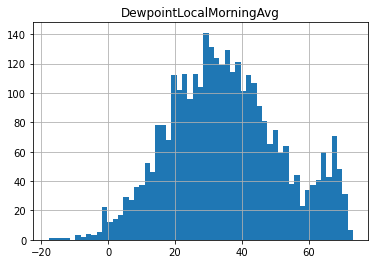

Text(0.5, 1.0, 'FeelsLikeLocalDaytimeAvg')

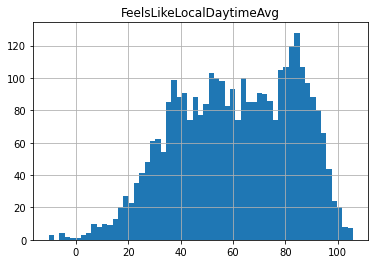

Text(0.5, 1.0, 'FeelsLikeLocalDaytimeMax')

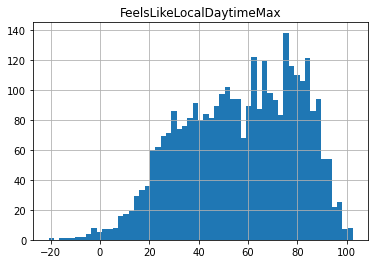

Text(0.5, 1.0, 'FeelsLikeLocalDaytimeMin')

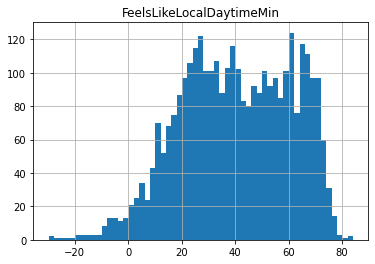

Text(0.5, 1.0, 'GustLocalDayMax')

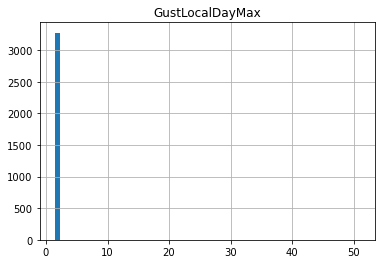

Text(0.5, 1.0, 'GustLocalDaytimeAvg')

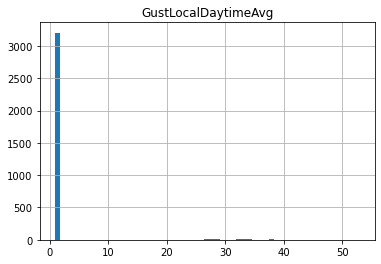

Text(0.5, 1.0, 'GustLocalMorningAvg')

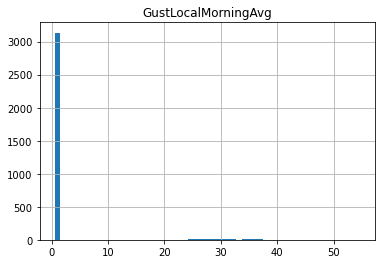

Text(0.5, 1.0, 'PrecipAmountLocalDayAvg')

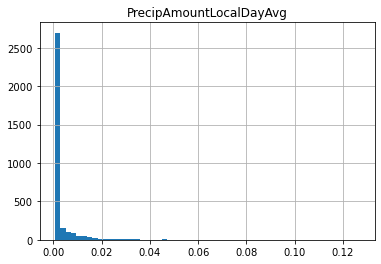

Text(0.5, 1.0, 'PrecipAmountLocalDayMax')

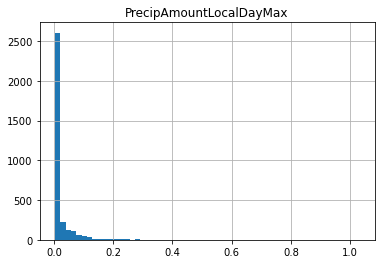

Text(0.5, 1.0, 'PrecipAmountLocalDayMin')

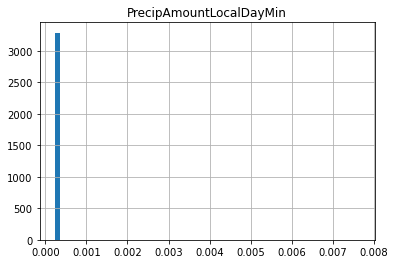

Text(0.5, 1.0, 'PrecipAmountLocalDaytimeAvg')

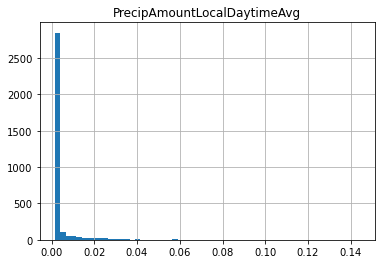

Text(0.5, 1.0, 'PrecipAmountLocalEveningAvg')

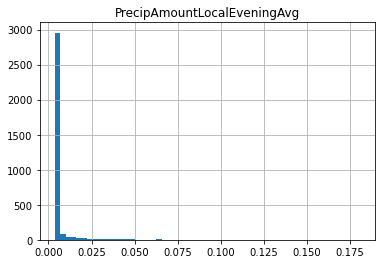

Text(0.5, 1.0, 'RelativeHumidityLocalDaytimeAvg')

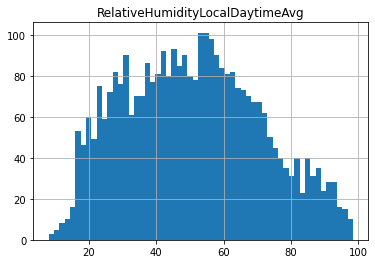

Text(0.5, 1.0, 'RelativeHumidityLocalDaytimeMax')

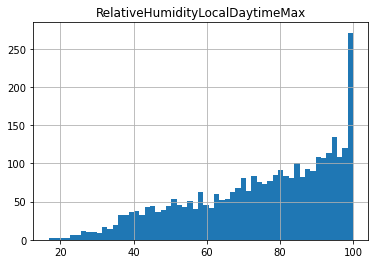

Text(0.5, 1.0, 'RelativeHumidityLocalDaytimeMin')

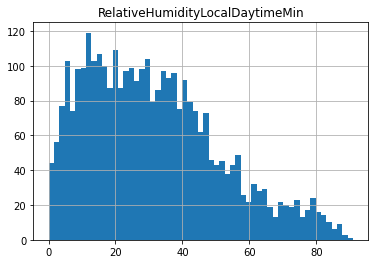

Text(0.5, 1.0, 'SnowAmountLocalDayMax')

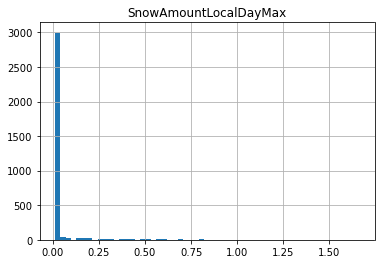

Text(0.5, 1.0, 'TemperatureLocalDaytimeAvg')

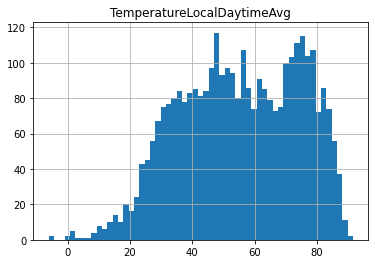

Text(0.5, 1.0, 'TemperatureLocalDaytimeMax')

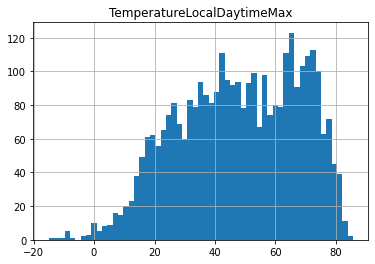

Text(0.5, 1.0, 'TemperatureLocalDaytimeMin')

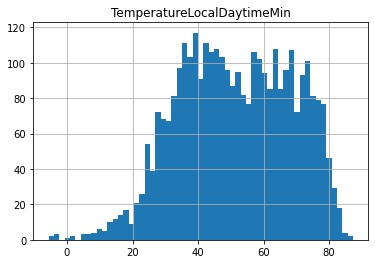

Text(0.5, 1.0, 'UVIndexLocalDaytimeAvg')

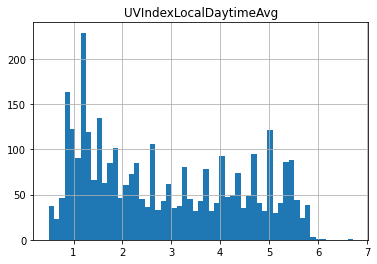

Text(0.5, 1.0, 'VisibilityLocalDaytimeAvg')

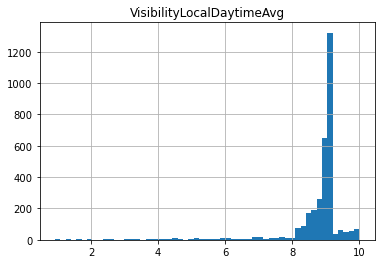

Text(0.5, 1.0, 'WindSpeedLocalDaytimeAvg')

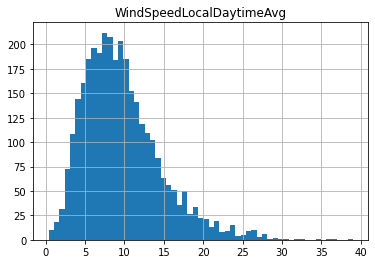

Text(0.5, 1.0, 'day')

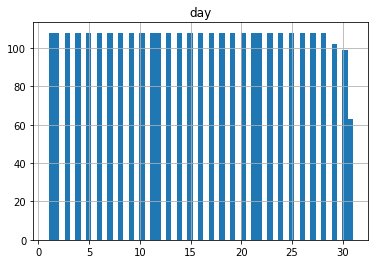

Text(0.5, 1.0, 'discount')

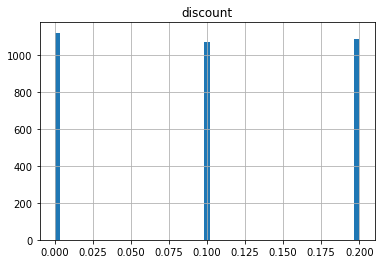

Text(0.5, 1.0, 'hour')

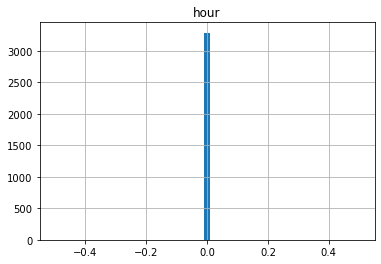

Text(0.5, 1.0, 'minute')

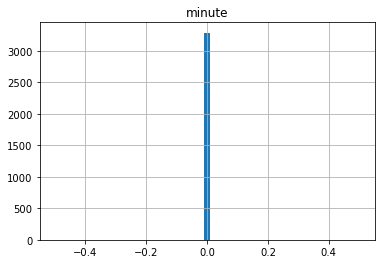

Text(0.5, 1.0, 'month')

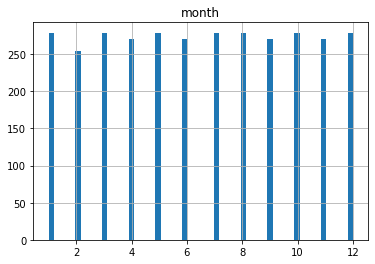

Text(0.5, 1.0, 'quarter')

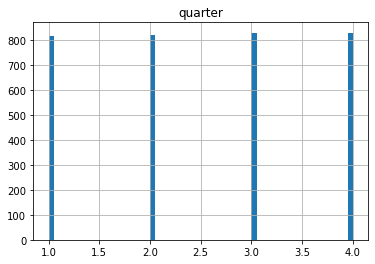

Text(0.5, 1.0, 'sales')

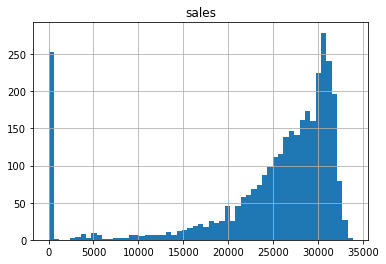

Text(0.5, 1.0, 'weekday')

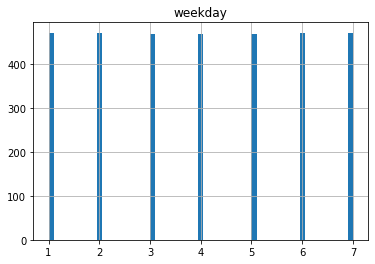

Text(0.5, 1.0, 'year')

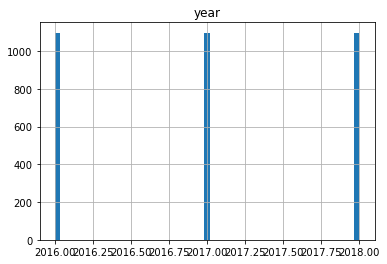

Text(0.5, 1.0, 'date')

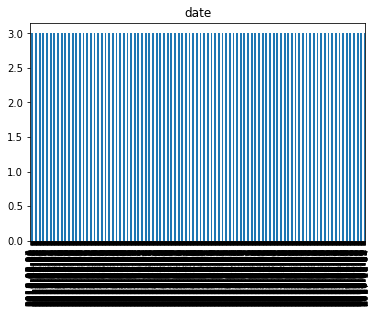

Text(0.5, 1.0, 'dateW')

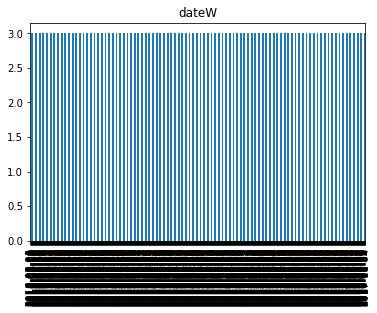

Text(0.5, 1.0, 'placeId')

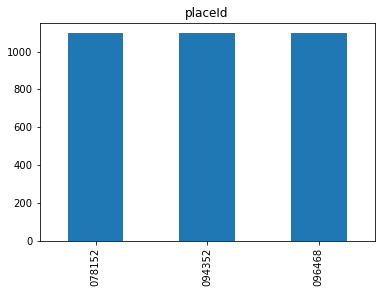

Text(0.5, 1.0, 'placeName')

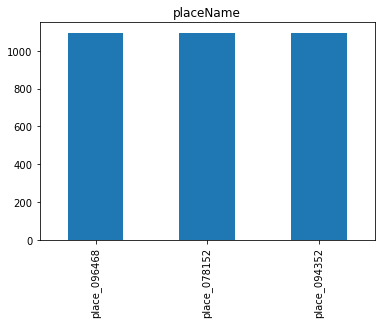

Text(0.5, 1.0, 'postalcode')

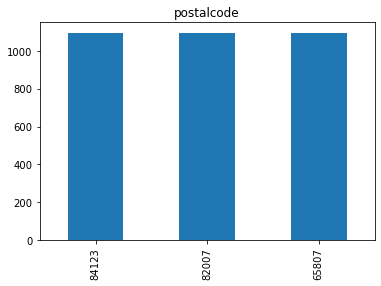

Text(0.5, 1.0, 'postalcodeW')

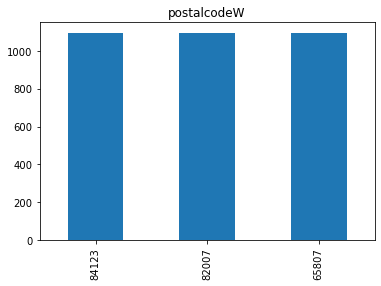

Text(0.5, 1.0, 'producttype')

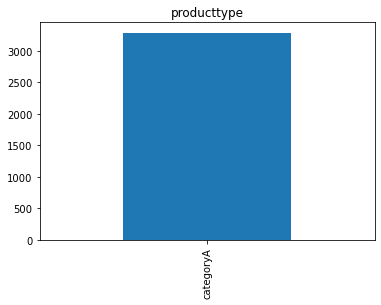

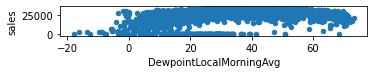

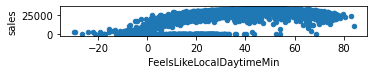

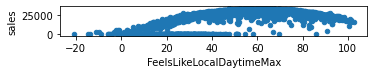

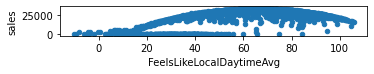

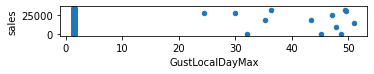

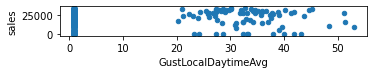

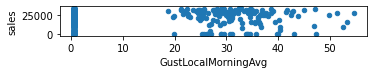

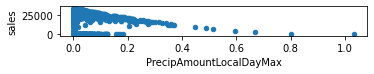

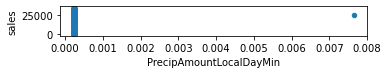

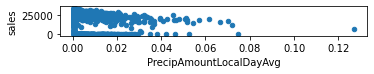

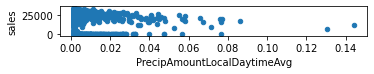

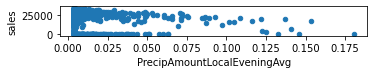

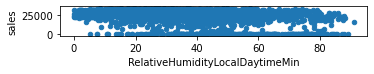

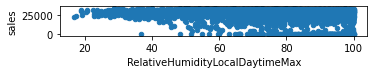

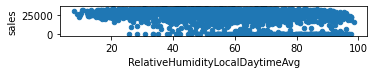

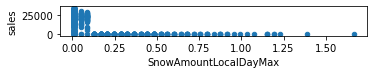

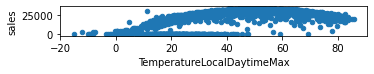

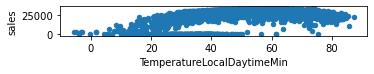

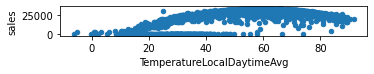

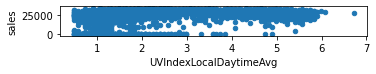

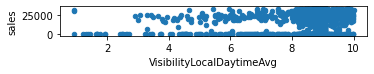

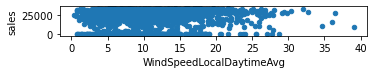

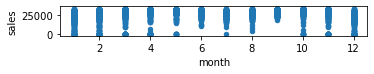

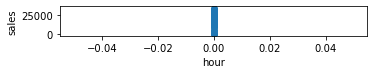

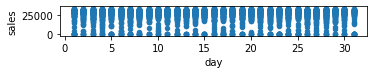

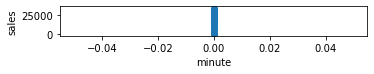

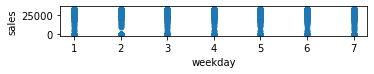

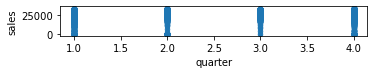

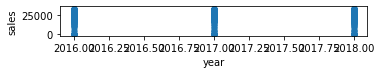

{'sales': 'mean'}
{'DewpointLocalMorningAvg': 'mean', 'FeelsLikeLocalDaytimeMin': 'mean', 'FeelsLikeLocalDaytimeMax': 'mean', 'FeelsLikeLocalDaytimeAvg': 'mean', 'GustLocalDayMax': 'mean', 'GustLocalDaytimeAvg': 'mean', 'GustLocalMorningAvg': 'mean', 'PrecipAmountLocalDayMax': 'mean', 'PrecipAmountLocalDayMin': 'mean', 'PrecipAmountLocalDayAvg': 'mean', 'PrecipAmountLocalDaytimeAvg': 'mean', 'PrecipAmountLocalEveningAvg': 'mean', 'RelativeHumidityLocalDaytimeMin': 'mean', 'RelativeHumidityLocalDaytimeMax': 'mean', 'RelativeHumidityLocalDaytimeAvg': 'mean', 'SnowAmountLocalDayMax': 'mean', 'TemperatureLocalDaytimeMax': 'mean', 'TemperatureLocalDaytimeMin': 'mean', 'TemperatureLocalDaytimeAvg': 'mean', 'UVIndexLocalDaytimeAvg': 'mean', 'VisibilityLocalDaytimeAvg': 'mean', 'WindSpeedLocalDaytimeAvg': 'mean'}
{'date': 'count'}
combo columns: ['producttype', 'placeId']
(3, 26) [1, 3] 3


,producttype,placeId,samplesize,sales,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg
0,categoryA,078152,1096,25593.128695,45.804854,46.136297,62.695632,66.731856,1.538349,1.388009,1.396754,0.027505,0.000235,0.003483,0.004091,0.006725,41.026790,86.752596,61.686160,0.017200,52.308133,56.420352,59.618595,2.951441,8.766063,9.397811
1,categoryA,094352,1096,23486.023303,26.862355,32.817283,49.550048,53.886029,1.846140,2.605646,3.579445,0.016448,0.000235,0.002343,0.003269,0.005870,25.288375,69.089909,44.536169,0.060306,42.684867,45.802816,50.006341,2.818616,8.691676,12.152838
2,categoryA,096468,1096,24659.807609,33.040562,42.289290,57.866837,62.412814,1.454665,1.165939,1.183061,0.016743,0.000241,0.002687,0.003616,0.006090,27.486369,68.022810,46.168842,0.041376,48.835907,52.222706,56.053138,2.771219,8.723335,7.561547


{'date': 'count', 'placeId': <function <lambda> at 0x7fecdd399b90>}
combo columns: ['producttype']
(1, 26) [1] 1


,producttype,samplesize,placeId,sales,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg
0,categoryA,3288,"[078152, 096468, 094352]",24579.653203,35.235924,40.41429,56.704172,61.010233,1.613051,1.719865,2.053087,0.020232,0.000237,0.002838,0.003659,0.006228,31.267178,74.621772,50.797057,0.039627,47.942969,51.481958,55.226025,2.847092,8.727025,9.704065


{'date': 'count', 'producttype': <function <lambda> at 0x7fecdd3790e0>}
combo columns: ['placeId']
(3, 26) [3] 3


,placeId,samplesize,producttype,sales,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg
0,078152,1096,[categoryA],25593.128695,45.804854,46.136297,62.695632,66.731856,1.538349,1.388009,1.396754,0.027505,0.000235,0.003483,0.004091,0.006725,41.026790,86.752596,61.686160,0.017200,52.308133,56.420352,59.618595,2.951441,8.766063,9.397811
1,094352,1096,[categoryA],23486.023303,26.862355,32.817283,49.550048,53.886029,1.846140,2.605646,3.579445,0.016448,0.000235,0.002343,0.003269,0.005870,25.288375,69.089909,44.536169,0.060306,42.684867,45.802816,50.006341,2.818616,8.691676,12.152838
2,096468,1096,[categoryA],24659.807609,33.040562,42.289290,57.866837,62.412814,1.454665,1.165939,1.183061,0.016743,0.000241,0.002687,0.003616,0.006090,27.486369,68.022810,46.168842,0.041376,48.835907,52.222706,56.053138,2.771219,8.723335,7.561547


DONE: 'STEP 1.3: Explore Data' analysis


In [4]:

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# compute number of dependent variables
num_dvariables = len(list_variablesdependent)

#
list_columnsall = df.columns.to_list()
list_columnsnumerical = sorted(df.select_dtypes(include=['float64', 'int64']).columns.to_list())
list_columnscategorical = sorted(list(set(list_columnsall) - set(list_columnsnumerical)))
valu_numrows = df.shape[0]

#
for colnow in list_columnsnumerical:    
    df[colnow].hist(bins=int(math.sqrt(valu_numrows)))
    plt.title(colnow)
    plt.show()
    
#
for colnow in list_columnscategorical:    
    df[colnow].value_counts().plot(kind="bar")
    plt.title(colnow)
    plt.show()
    
#
for colnow in list_colpick_weather + list_columnsother:
    fig, figaxes = plt.subplots(1, num_dvariables, figsize=(5 * num_dvariables, num_dvariables));
    fig.tight_layout()
    
    #
    # note: if ~isinstance(figaxes, Iterable) then figaxes = (figaxes, )
    if num_dvariables == 1:
        figaxes = [figaxes]
    
    for axnow, dvnow in zip(figaxes, list_variablesdependent):
        df[[dvnow, colnow]].plot(ax=axnow, kind='scatter', y=dvnow, x=colnow)
    
    plt.subplots_adjust(wspace=0.55)
    plt.show()
    

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

#
dict_columnsagg_part2 = {}
for ii in list_variablesdependent:
    dict_columnsagg_part2.update({ii: "mean"})

print(dict_columnsagg_part2)

#
dict_columnsagg_part3 = {}
for ii in list_colpick_weather:
    dict_columnsagg_part3.update({ii: "mean"})

print(dict_columnsagg_part3)


#
for rr in range(len(list_columnscomboby), 0, -1):

    list_combos = list(itertools.combinations(list_columnscomboby, rr))
    
    for combo_now in list_combos:
        
        #
        list_columnscomboby_now = list(combo_now)
        list_columnstolambda = list(set(list_columnscomboby) - set(list_columnscomboby_now))
        
        #
        dict_columnsagg_part1 = {"date": "count"}
        for ii in list_columnstolambda:
            dict_columnsagg_part1.update({ii: lambda x: list(set(x))})

        print(dict_columnsagg_part1)

        #
        dict_columnsagg_full = {}
        dict_columnsagg_full.update(dict_columnsagg_part1)
        dict_columnsagg_full.update(dict_columnsagg_part2)
        dict_columnsagg_full.update(dict_columnsagg_part3)

        #
        dfA = df.groupby(list_columnscomboby_now, as_index=False).agg(dict_columnsagg_full).\
            reset_index(inplace=False, drop=True).\
            rename(columns={"date": "samplesize"})

        #
        temp = df.loc[:, list_columnscomboby_now].nunique().tolist()
        print("combo columns: " + str(list_columnscomboby_now))
        print(dfA.shape, temp, np.prod(temp))
#         mydfdescribe(dfA)
        display(dfA.sort_values(by=list_columnscomboby_now, ascending=[True]*len(list_columnscomboby_now)))


# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.3: Explore Data' analysis")


# STEP 2.1: Build Predictive Models

This step builds machine-learning-based predictive models using the specified algorithms in the *list_mla* configuration and the data computed by the *makedatastrata* function as inputs to the *makemodels* function. The *makedatastrata* function divides the entire original data according to all combinations of the unique values from the variables in the *list_columnsstratby* configuration, thereby computing a list of datasets with each list item is a data strata corresponding to a combination. Changing the *list_mla* configuration parameter facilitates trying different model types. But presently this example builds models using one algorithm per the following two approaches with basic arbitrary parameters (rather than optimized parameters for instance via a grid search algorithm) for model estimation (aka tuning aka data fitting).

 1. Random Forest Regressor *with* the weather Data
 2. Random Forest Regressor *without* the weather Data

The *makemodels* code splits each stratified dataset into a model training dataset (i.e., ~75% of the sample data) and a model testing dataset (i.e., ~25% of the sample data) to both estimate a model with the training data then evaluate the estimated model with the testing data.  The evaluation analysis encompasses the n-fold crossvalidation technique to tune each model whereby the *num_cvrepeats* configuration specifies the n (number of folds) of the n-fold process. The function also finds the best-performing crossvalidated model per machine-learning algorithm via a score (aka objective function) specified by the *valu_metricpickbestmodel* configuration. The code also displays some model estimation results during computation. Lastly, the *makemodels* function builds each model and returns the process results as a dictionary (*dict_results* in the above function) with the following various content. Each dictionary is an element in a list of all results spanning the combinations of stratified dataset and machine-learning algorithm.

    dict_results["name_data"] is a string identifying the stratified dataset as model input data
    dict_results["variables_independent"] is a list of independent variables in the model input data
    dict_results["variable_dependent"] = is a string naming the dependent variable for model prediction 
    dict_results["datascaler"] = is an object that scales each independent variable of model input data
    dict_results["name_mla"] = is a string naming the machine-learning algorithm that made the model
    dict_results["cvresults_models"] = is a list of crossvalidation results each item a dictionary of model info
    dict_results["cvresults_modelbest"] = is a dictionary of the best crossvalidation result model
    dict_results["cvresults_modelbestscore"] = is a float of the best crossvalidation result model score
    dict_results["cvresults_modelbestindex"] = is a float of the best crossvalidation result model score index

This step builds only six total models (i.e., the first three strata per the two approaches of the one machine-learing algorithm) for demonstrative purposes.

In [5]:
# ----------------------------------------------------------------------------------------------------------------------
# PICK A FEW PLACES
# ----------------------------------------------------------------------------------------------------------------------

# restrict subsequent data analyses to the first three (3) places
list_fewplaces = df["placeId"].unique().tolist()[0:3]
dffew = df.loc[df["placeId"].isin(list_fewplaces), :]

# save table: independent variables (i.e., weather variables) and dependent variables (e.g., sales variable)
savefile = "/project_data/data_asset/weather_and_sales.csv"
dfX = dffew.loc[dffew["year"].isin(list_keepyears_apply), ["date", "placeId"] + list_colpick_weather + list_variablesdependent]
# dfX.to_csv(savefile, sep=",", header=True, index=False)

# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE STRATIFIED DATASETS
# ----------------------------------------------------------------------------------------------------------------------

#
ttic = time.time()
datastrata_build1 = makedatastrata(dffew, "withweather", list_keepyears_build)
##TT fix attempt-->## #datastrata_build2 = makedatastrata(dffew.drop(columns=list_columnsweather_all, inplace=False, errors="ignore"), "withoutweather", list_keepyears_build)
datastrata_apply1 = makedatastrata(dffew, "withweather", list_keepyears_apply)
##TT fix attempt-->## #datastrata_apply2 = makedatastrata(dffew.drop(columns=list_columnsweather_all, inplace=False, errors="ignore"), "withoutweather", list_keepyears_apply)


ttoc = time.time()
print("elapsed time of makedatastrata:", ttoc - ttic)

# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE MODELS
# ----------------------------------------------------------------------------------------------------------------------

# compute models
ttic = time.time()
list_mla = [
    RandomForestRegressor(max_depth=5, n_estimators=3, max_features=20, criterion="mae")]

results_modelsbuild1 = makemodels(datastrata_build1, list_mla)
##TT fix attempt-->## #results_modelsbuild2 = makemodels(datastrata_build2, list_mla)
ttoc = time.time()
print("elapsed time of makemodels:", ttoc - ttic)

# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE "MODEL EVALUATION" RESULTS: VIA "APPLY MODEL" PREDICTIONS
# ----------------------------------------------------------------------------------------------------------------------

# compute related plots
ttic = time.time()
results_evaluateapply1 = evalmodels_apply(datastrata_apply1, results_modelsbuild1)

ttoc = time.time()
print("elapsed time of evalmodels_build:", ttoc - ttic)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 2.1: Build Predictive Models' Work")


dataset size (dfM): (3288, 34)


,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg,sales,placeId,minute,hour,weekday,day,month,quarter,year,date,group,columns_ohe
0,19.294962,13.980513,29.574154,33.848282,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,35.408451,90.968269,58.350410,0.010339,25.651545,28.390444,32.289480,1.239738,8.665123,8.255852,0.00,078152,0,0,6,1,1,1,2016,2016-01-01,"(078152,)",NaN
1,-2.485020,-6.179487,15.714154,18.218306,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,24.008451,48.268269,38.833743,0.010339,14.851545,15.610444,20.739474,1.156404,8.665123,10.306436,0.00,094352,0,0,6,1,1,1,2016,2016-01-01,"(094352,)",NaN
2,-1.825032,-5.459487,21.294154,21.368306,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,33.308451,74.368269,51.325412,0.010339,10.891545,10.030444,15.249474,1.156404,9.503822,1.768552,0.00,096468,0,0,6,1,1,1,2016,2016-01-01,"(096468,)",NaN
3,20.764968,17.220513,40.014154,42.203270,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,24.108451,80.668269,48.700412,0.010339,34.651545,31.270444,39.114468,1.323071,8.581911,8.628686,26100.46,078152,0,0,7,2,1,1,2016,2016-01-02,"(078152,)",NaN
4,2.314968,2.640513,27.954154,26.948270,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,21.408451,64.668269,39.817077,0.010339,22.951545,22.990444,26.799444,1.156404,8.500149,8.088077,16744.62,094352,0,0,7,2,1,1,2016,2016-01-02,"(094352,)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,12.364962,21.540513,24.534154,34.148270,1.454665,27.060162,31.111135,0.003129,0.000235,0.000666,0.001574,0.003777,23.008451,51.568269,37.875411,0.010339,26.011545,36.490444,34.989480,1.073071,9.047473,18.807035,22806.20,094352,0,0,1,30,12,4,2018,2018-12-30,"(094352,)",NaN
3284,18.904902,19.560513,19.674154,29.798282,1.454665,0.902338,0.598340,0.046436,0.000235,0.009384,0.016198,0.007058,56.808451,94.668269,75.975407,0.443409,18.091545,31.090444,27.639468,0.739738,7.633961,9.803110,0.00,096468,0,0,1,30,12,4,2018,2018-12-30,"(096468,)",NaN
3285,39.514956,31.800513,35.514154,44.324282,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,69.508451,99.268269,87.517077,0.010339,29.071545,46.750444,40.899474,0.573071,8.431025,7.659319,0.00,078152,0,0,2,31,12,4,2018,2018-12-31,"(078152,)",NaN
3286,-3.565038,-19.319487,-20.825846,-10.351726,1.454665,0.902338,34.037879,0.018877,0.000235,0.005166,0.015354,0.004433,62.708451,83.568269,75.000411,0.285929,-9.628455,7.150444,1.509462,0.739738,4.544866,18.657903,0.00,094352,0,0,2,31,12,4,2018,2018-12-31,"(094352,)",NaN


dependent variable (aka criterion variable): SALES
dependent variable has existence in the data: True
dataset: clientname_withweather_('078152',); sample size: 731
dataset: clientname_withweather_('094352',); sample size: 731
dataset: clientname_withweather_('096468',); sample size: 731
dataset size (dfM): (3288, 34)


,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg,sales,placeId,minute,hour,weekday,day,month,quarter,year,date,group,columns_ohe
0,19.294962,13.980513,29.574154,33.848282,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,35.408451,90.968269,58.350410,0.010339,25.651545,28.390444,32.289480,1.239738,8.665123,8.255852,0.00,078152,0,0,6,1,1,1,2016,2016-01-01,"(078152,)",NaN
1,-2.485020,-6.179487,15.714154,18.218306,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,24.008451,48.268269,38.833743,0.010339,14.851545,15.610444,20.739474,1.156404,8.665123,10.306436,0.00,094352,0,0,6,1,1,1,2016,2016-01-01,"(094352,)",NaN
2,-1.825032,-5.459487,21.294154,21.368306,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,33.308451,74.368269,51.325412,0.010339,10.891545,10.030444,15.249474,1.156404,9.503822,1.768552,0.00,096468,0,0,6,1,1,1,2016,2016-01-01,"(096468,)",NaN
3,20.764968,17.220513,40.014154,42.203270,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,24.108451,80.668269,48.700412,0.010339,34.651545,31.270444,39.114468,1.323071,8.581911,8.628686,26100.46,078152,0,0,7,2,1,1,2016,2016-01-02,"(078152,)",NaN
4,2.314968,2.640513,27.954154,26.948270,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,21.408451,64.668269,39.817077,0.010339,22.951545,22.990444,26.799444,1.156404,8.500149,8.088077,16744.62,094352,0,0,7,2,1,1,2016,2016-01-02,"(094352,)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,12.364962,21.540513,24.534154,34.148270,1.454665,27.060162,31.111135,0.003129,0.000235,0.000666,0.001574,0.003777,23.008451,51.568269,37.875411,0.010339,26.011545,36.490444,34.989480,1.073071,9.047473,18.807035,22806.20,094352,0,0,1,30,12,4,2018,2018-12-30,"(094352,)",NaN
3284,18.904902,19.560513,19.674154,29.798282,1.454665,0.902338,0.598340,0.046436,0.000235,0.009384,0.016198,0.007058,56.808451,94.668269,75.975407,0.443409,18.091545,31.090444,27.639468,0.739738,7.633961,9.803110,0.00,096468,0,0,1,30,12,4,2018,2018-12-30,"(096468,)",NaN
3285,39.514956,31.800513,35.514154,44.324282,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,69.508451,99.268269,87.517077,0.010339,29.071545,46.750444,40.899474,0.573071,8.431025,7.659319,0.00,078152,0,0,2,31,12,4,2018,2018-12-31,"(078152,)",NaN
3286,-3.565038,-19.319487,-20.825846,-10.351726,1.454665,0.902338,34.037879,0.018877,0.000235,0.005166,0.015354,0.004433,62.708451,83.568269,75.000411,0.285929,-9.628455,7.150444,1.509462,0.739738,4.544866,18.657903,0.00,094352,0,0,2,31,12,4,2018,2018-12-31,"(094352,)",NaN


dependent variable (aka criterion variable): SALES
dependent variable has existence in the data: True
dataset: clientname_withweather_('078152',); sample size: 365
dataset: clientname_withweather_('094352',); sample size: 365
dataset: clientname_withweather_('096468',); sample size: 365
elapsed time of makedatastrata: 0.21326446533203125
sample size of group clientname_withweather_('078152',): 731

dependent variable (aka criterion variable): SALES
any nan: False ;  all finite: True
any nan: False ;  all finite: True
mla: RANDOMFOREST

{'fit_time': array([0.01823854, 0.0151484 , 0.01556039, 0.01603794, 0.01491594]), 'score_time': array([0.00349712, 0.00299406, 0.0027616 , 0.00284314, 0.00262976]), 'estimator': (RandomForestRegressor(criterion='mae', max_depth=5, max_features=20,
                      n_estimators=3), RandomForestRegressor(criterion='mae', max_depth=5, max_features=20,
                      n_estimators=3), RandomForestRegressor(criterion='mae', max_depth=5, max_feature

{'fit_time': array([0.01566839, 0.01952696, 0.01545548, 0.01498246, 0.01532888]), 'score_time': array([0.00269294, 0.00275111, 0.00285172, 0.00263524, 0.0023911 ]), 'estimator': (RandomForestRegressor(criterion='mae', max_depth=5, max_features=20,
                      n_estimators=3), RandomForestRegressor(criterion='mae', max_depth=5, max_features=20,
                      n_estimators=3), RandomForestRegressor(criterion='mae', max_depth=5, max_features=20,
                      n_estimators=3), RandomForestRegressor(criterion='mae', max_depth=5, max_features=20,
                      n_estimators=3), RandomForestRegressor(criterion='mae', max_depth=5, max_features=20,
                      n_estimators=3)), 'test_neg_mean_absolute_error': array([ -540.84148649, -1204.30396396, -1010.98891892, -1615.93074074,
       -1394.56805556]), 'train_neg_mean_absolute_error': array([-799.82429224, -923.49310502, -627.00702055, -619.39689342,
       -666.10148526]), 'test_neg_median_absolute_er

# STEP 2.2: Make then Save Dashboard Data

This step computes the following three files as the primary dashboard data both to evaluate the predictive performance of models built using weather data and to explore any potential predictive relationships between the weather variables and the sales variable. The files have storage in the `/project_data/data_asset/` directory of the provided WML CP4D project (e.g., see the "Files" tab of the "Find and Add Data" icon).<br>

* *buildmodels_performances.csv*: use for a boxplots figure that illustrates better predictions via "with weather data" approach than "without weather data" approach.
 
* *variables_importances.csv*: use for a heatmap figure that illustrates the variables importances per model.
 
* *timevariantresults.csv*: use for the remaining (i.e., scatterplots and mapplot) figures that illustrate additional predictive performance evaluations, possible correlations between sales and weather, and location-specific sales predictions.

In [6]:
# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE THEN SAVE "MODELS VARIABLES IMPORTANCES" TABLE
# ----------------------------------------------------------------------------------------------------------------------

#
savefile = "/project_data/data_asset/variables_importances.csv"

#
list_mvars = ["machinelearner"]
list_cvars = ["client", "datatype"] + list_columnsstratby
list_ivars = results_modelsbuild1[0]["variables_independent"]
data_varimpvals = []

#
for ii in results_modelsbuild1:
    
    #
    list_mlavals = [str(ii["cvresults_modelbest"]["estimator"]).split("(")[0].lower()]
    
    #
    temp = ii["cvresults_modelbest"]["variables_importances"]
    list_impvals = [dict(temp)[vv] if vv in list(dict(temp).keys()) else 0.0 for vv in list_ivars]
    
    #
    temp = ii["name_data"].replace("(", "").replace(")", "").replace("'", "").replace(" ", "").replace("_", ",")
    if len(list_columnsstratby) == 1:
        list_catvals = temp[:-1].split(",")
    else:
        list_catvals = temp.split(",")
    
    # initialize list of lists 
    data_varimpvals.append(list_catvals + list_impvals + list_mlavals)
    
# compute dataframe
dfV = pd.DataFrame(data_varimpvals, columns=(list_cvars + list_ivars + list_mvars))
dfV = dfV.merge(df1a.loc[:, ["placeId", "placeName", "postalcode", "countrycode"]].drop_duplicates(), 
                      left_on=["placeId"], right_on=["placeId"], how="left")

# confirm table
mydfdescribe(dfV)
display(dfV)
dfV.shape

# save table
dfV.loc[(dfV["machinelearner"] == "randomforestregressor"), :].to_csv(savefile, sep=",", header=True, index=False)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 2.2a: Make then Store Model Variables Importances Data' Work")


,dtypes,nunique,count,percent_nan,percent_blank,percent_zero,percent_negative,min,max,kurtosis
client,object,1,3,0.0,0.0,0.000000,NaN,clientname,clientname,NaN
datatype,object,1,3,0.0,0.0,0.000000,NaN,withweather,withweather,NaN
placeId,object,3,3,0.0,0.0,0.000000,NaN,078152,096468,NaN
DewpointLocalMorningAvg,float64,3,3,0.0,0.0,0.333333,0.0,0,0.0162492,NaN
FeelsLikeLocalDaytimeMin,float64,3,3,0.0,0.0,0.000000,0.0,0.0256356,0.108285,NaN
FeelsLikeLocalDaytimeMax,float64,3,3,0.0,0.0,0.000000,0.0,0.0321896,0.458332,NaN
FeelsLikeLocalDaytimeAvg,float64,3,3,0.0,0.0,0.000000,0.0,0.0217253,0.143756,NaN
GustLocalDayMax,float64,1,3,0.0,0.0,1.000000,0.0,0,0,NaN
GustLocalDaytimeAvg,float64,1,3,0.0,0.0,1.000000,0.0,0,0,NaN
GustLocalMorningAvg,float64,1,3,0.0,0.0,1.000000,0.0,0,0,NaN


,client,datatype,placeId,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg,minute,hour,weekday,day,month,quarter,machinelearner,placeName,postalcode,countrycode
0,clientname,withweather,078152,0.016249,0.027615,0.458332,0.021725,0.0,0.0,0.0,0.035711,0.0,0.104005,0.000000,0.000000,0.000000,0.014519,0.002291,0.000000,0.142993,0.013716,0.120234,0.017607,0.006967,0.012628,0.0,0.0,0.00000,0.001643,0.000000,0.003767,randomforestregressor,place_078152,65807,us
1,clientname,withweather,094352,0.000864,0.025636,0.211181,0.066313,0.0,0.0,0.0,0.077505,0.0,0.007705,0.000000,0.002674,0.012617,0.000303,0.006969,0.087652,0.253819,0.006019,0.211362,0.006928,0.018852,0.000634,0.0,0.0,0.00077,0.002200,0.000000,0.000000,randomforestregressor,place_094352,82007,us
2,clientname,withweather,096468,0.000000,0.108285,0.032190,0.143756,0.0,0.0,0.0,0.000000,0.0,0.026171,0.008559,0.000000,0.031746,0.000360,0.034298,0.388694,0.109668,0.067656,0.030501,0.000000,0.000000,0.001082,0.0,0.0,0.00000,0.000000,0.016949,0.000085,randomforestregressor,place_096468,84123,us


(3, 35)

DONE: 'STEP 2.2a: Make then Store Model Variables Importances Data' Work


,dtypes,nunique,count,percent_nan,percent_blank,percent_zero,percent_negative,min,max,kurtosis
approach,object,1.0,15,0.0,0.0,0.0,NaN,withweather,withweather,NaN
namedata,object,3.0,15,0.0,0.0,0.0,NaN,"clientname_withweather_('078152',)","clientname_withweather_('096468',)",NaN
vardependent,object,1.0,15,0.0,0.0,0.0,NaN,sales,sales,NaN
namemla,object,1.0,15,0.0,0.0,0.0,NaN,RANDOMFOREST,RANDOMFOREST,NaN
test_neg_mean_absolute_error,float64,15.0,15,0.0,0.0,0.0,1.0,-2205.14,-540.841,0.181246
train_neg_mean_absolute_error,float64,15.0,15,0.0,0.0,0.0,1.0,-1049.31,-619.397,-1.254110
test_r2,float64,15.0,15,0.0,0.0,0.0,0.0,0.459521,0.990792,4.266567
placeId,object,3.0,15,0.0,0.0,0.0,NaN,078152,096468,-1.615385
score_time,float64,15.0,15,0.0,0.0,0.0,0.0,0.0023911,0.0040369,1.585133
fit_time,float64,15.0,15,0.0,0.0,0.0,0.0,0.0149159,0.019527,1.519602


,approach,namedata,vardependent,namemla,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,placeId,score_time,fit_time,train_explained_variance,test_explained_variance,variables_importances,test_neg_median_absolute_error,train_neg_median_absolute_error,train_r2,estimator,placeName,postalcode,countrycode
0,withweather,"clientname_withweather_('078152',)",sales,RANDOMFOREST,-1214.590991,-905.218927,0.842921,078152,0.003497,0.018239,0.940652,0.855337,"[(FeelsLikeLocalDaytimeMax, 0.45833180906738563), (TemperatureLocalDaytimeMax, 0.14299257031241064), (TemperatureLocalDaytimeAvg, 0.12023416531463406), (PrecipAmountLocalDayAvg, 0.10400467697552049), (PrecipAmountLocalDayMax, 0.03571077537635028), (FeelsLikeLocalDaytimeMin, 0.02761504402911209), (FeelsLikeLocalDaytimeAvg, 0.021725256902352545), (UVIndexLocalDaytimeAvg, 0.017606953091120665), (DewpointLocalMorningAvg, 0.016249185961286876), (RelativeHumidityLocalDaytimeMax, 0.01451899185074129), (TemperatureLocalDaytimeMin, 0.013715736200685268), (WindSpeedLocalDaytimeAvg, 0.01262819974777223), (VisibilityLocalDaytimeAvg, 0.00696658003047969), (quarter, 0.00376693496365081), (RelativeHumidityLocalDaytimeAvg, 0.0022906102406356887), (day, 0.0016425099358619492)]",-698.433333,-519.323333,0.940634,"(DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=20,\n random_state=1727178243), DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=20,\n random_state=544278896), DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=20,\n random_state=163003831))",place_078152,65807,us
1,withweather,"clientname_withweather_('078152',)",sales,RANDOMFOREST,-2205.136396,-749.263071,0.641236,078152,0.002994,0.015148,0.961644,0.645119,"[(FeelsLikeLocalDaytimeMax, 0.42488057878136226), (TemperatureLocalDaytimeAvg, 0.11475005546422558), (TemperatureLocalDaytimeMax, 0.10924752909977238), (PrecipAmountLocalDayMax, 0.08532701243381895), (DewpointLocalMorningAvg, 0.05732447683391818), (FeelsLikeLocalDaytimeAvg, 0.05451388282475376), (UVIndexLocalDaytimeAvg, 0.030406639814412346), (PrecipAmountLocalDayAvg, 0.029574955728499473), (WindSpeedLocalDaytimeAvg, 0.025880534995573804), (RelativeHumidityLocalDaytimeAvg, 0.017684686015821145), (weekday, 0.01179086979707507), (TemperatureLocalDaytimeMin, 0.011215042080570349), (RelativeHumidityLocalDaytimeMin, 0.009782062109645157), (day, 0.008873939031797033), (VisibilityLocalDaytimeAvg, 0.004855374626428933), (month, 0.0022519351800947174), (FeelsLikeLocalDaytimeMin, 0.0016404251822309404)]",-1021.030000,-502.761667,0.961176,"(DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=20,\n random_state=495214304), DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=20,\n random_state=2132157033), DecisionTreeRegressor(criterion='mae', max_depth=5, max_features=20,\n random_state=1846428811))",place_078152,65807,us
2,withweather,"clientname_withweather_('078152',)",sales,RANDOMFOREST,-1712.592793,-1049.305913,0.836473,078152,0.002762,0.015560,0.878200,0.836738,"[(FeelsLikeLocalDaytimeMax, 0.3619864696217656), (TemperatureLocalDaytimeAvg, 0.1434215292682574), (TemperatureLocalDaytimeMax, 0.10170086413840834), (DewpointLocalMorningAvg, 0.06571558023304788), (WindSpeedLocalDaytimeAvg, 0.04955343512575819), (FeelsLikeLocalDaytimeAvg, 0.04695562049581038), (PrecipAmountLocalDayMax, 0.0421823451156909), (TemperatureLocalDaytimeMin, 0.0403982121837336), (PrecipAmountLocalDayAvg, 0.03725374118280766), (UVIndexLocalDaytimeAvg, 0.026936369587124774), (day, 0.01780061003033902), (PrecipAmountLocalDaytimeAvg, 0.017421002941966985), (RelativeHumidityLocalDaytimeAvg, 0.012393090357398294), (VisibilityLocalDaytimeAvg, 0.008965809499046726), (weekday, 0.007577334655860462), (FeelsLikeLocalDaytimeMin, 0.006464343308632272), (RelativeHumidityLocalDaytimeMax, 0.005088917047522721), (PrecipAmountLocalEveningAvg, 0.004011150468718506), (month, 0.0021481268999595728), (RelativeHumidityLocalDaytimeMin, 0.0020254478381507434)]

(15, 20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fecd4654410>,
      dtype=object)

DONE: 'STEP 2.2b: Make then Store Build Model Performance Data' Work


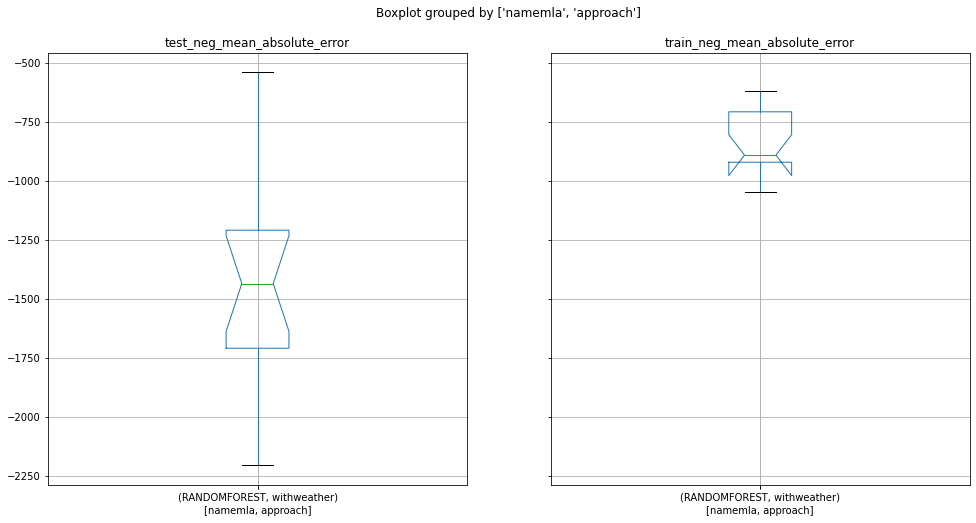

In [7]:
# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE THEN SAVE "MODEL EVALUATION" TABLE: VIA "BUILD MODEL" PERFORMANCE
# ----------------------------------------------------------------------------------------------------------------------

#
def getcolumns_fromdataname(dftemp, dataname):

    #
    temp = dataname.replace("(", "").replace(")", "").replace("'", "").replace(" ", "").replace("_", ",")
    if len(list_columnsstratby) == 1:
        list_valsnamedata = temp[:-1].split(",")
    else:
        list_valsnamedata = temp.split(",")

    #    
    for kk, jj in enumerate(list_columnsstratby):
        dftemp[jj] = list_valsnamedata[(kk + 2)]
        
    #
    return dftemp



#
savefile = "/project_data/data_asset/buildmodels_performances.csv"

#
list_columnsfirst = ["approach", "namedata", "vardependent", "namemla"]

#
dfP = pd.DataFrame({})

for ii in results_modelsbuild1: ##TT fix attempt-->## #+ results_modelsbuild2:
    dfTemp = pd.DataFrame(ii["cvresults_models"])
    dfTemp["approach"] = (lambda v: "withweather" if ("withweather" in v) else "withoutweather")(ii["name_data"])
    dfTemp = getcolumns_fromdataname(dfTemp, ii["name_data"])
    dfTemp["namedata"] = ii["name_data"]
    dfTemp["namemla"] = ii["name_mla"]
    dfTemp["vardependent"] = ii["variable_dependent"]
    dfP = pd.concat([dfP, dfTemp], axis=0)
    
dfP = dfP.loc[:, list_columnsfirst + list(set(dfP.columns) - set(list_columnsfirst))]
dfP = dfP.merge(df1a.loc[:, ["placeId", "placeName", "postalcode", "countrycode"]].drop_duplicates(), 
                      left_on=["placeId"], right_on=["placeId"], how="left")

# confirm table
mydfdescribe(dfP)
display(dfP)
dfP.shape

# save table
dfP.to_csv(savefile, sep=",", header=True, index=False)


#
list_plotmetrics = ["test_neg_mean_absolute_error", "train_neg_mean_absolute_error"]

dfP.boxplot(column=list_plotmetrics, by=["namemla", "approach"], notch=True, figsize=(16,8))

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 2.2b: Make then Store Build Model Performance Data' Work")


In [8]:
# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE THEN SAVE "MODEL EVALUATION" TABLE: VIA "APPLY MODEL" PREDICTIONS
# ----------------------------------------------------------------------------------------------------------------------

#
savefile = "/project_data/data_asset/applymodels_predictions.csv"

#
dfT1 = maketable_predictions(results_evaluateapply1).drop(columns=["datatype"], inplace=False, errors="ignore").rename(columns={"ypred": "ypredWith"})
#dfT2 = maketable_predictions(results_evaluateapply2).drop(columns=["datatype", "ytrue"], inplace=False, errors="ignore").rename(columns={"ypred": "ypredWithout"})

#dfT = dfT1.merge(dfT2, 
#                 left_on=["client", "namedepvar", "namemodel", "placeId", "date"], 
#                 right_on=["client", "namedepvar", "namemodel", "placeId", "date"], 
#                 how="left")

dfT = dfT1.merge(df1a.loc[:, ["placeId", "placeName", "postalcode", "countrycode"]].drop_duplicates(), 
                      left_on=["placeId"], right_on=["placeId"], how="left")

# confirm table
mydfdescribe(dfT)
display(dfT)
dfT.shape

# # save table
# dfT.to_csv(savefile, sep=",", header=True, index=False)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 2.2c: Make then Store Apply Model Predictions Data' Work")


,dtypes,nunique,count,percent_nan,percent_blank,percent_zero,percent_negative,min,max,kurtosis
client,object,1,1095,0.0,0.0,0.000000,NaN,clientname,clientname,NaN
namedepvar,object,1,1095,0.0,0.0,0.000000,NaN,sales,sales,NaN
namemodel,object,1,1095,0.0,0.0,0.000000,NaN,RANDOMFOREST,RANDOMFOREST,NaN
placeId,object,3,1095,0.0,0.0,0.000000,NaN,078152,096468,-1.501372
date,object,365,1095,0.0,0.0,0.000000,NaN,2018-01-01,2018-12-31,NaN
ytrue,float64,1006,1095,0.0,0.0,0.082192,0.0,0,33852.4,2.152083
ypredWith,float64,330,1095,0.0,0.0,0.058447,0.0,0,30955.2,2.826165
placeName,object,3,1095,0.0,0.0,0.000000,NaN,place_078152,place_096468,NaN
postalcode,object,3,1095,0.0,0.0,0.000000,NaN,65807,84123,-1.501372
countrycode,object,1,1095,0.0,0.0,0.000000,NaN,us,us,NaN


,client,namedepvar,namemodel,placeId,date,ytrue,ypredWith,placeName,postalcode,countrycode
0,clientname,sales,RANDOMFOREST,078152,2018-01-01,0.00,13259.526667,place_078152,65807,us
1,clientname,sales,RANDOMFOREST,078152,2018-01-02,4020.66,11153.730000,place_078152,65807,us
2,clientname,sales,RANDOMFOREST,078152,2018-01-03,11305.12,15997.453333,place_078152,65807,us
3,clientname,sales,RANDOMFOREST,078152,2018-01-04,13228.25,15997.453333,place_078152,65807,us
4,clientname,sales,RANDOMFOREST,078152,2018-01-05,21523.94,21237.560000,place_078152,65807,us
...,...,...,...,...,...,...,...,...,...,...
1090,clientname,sales,RANDOMFOREST,096468,2018-12-27,0.00,0.000000,place_096468,84123,us
1091,clientname,sales,RANDOMFOREST,096468,2018-12-28,15017.76,20499.386667,place_096468,84123,us
1092,clientname,sales,RANDOMFOREST,096468,2018-12-29,16917.92,23287.133333,place_096468,84123,us
1093,clientname,sales,RANDOMFOREST,096468,2018-12-30,0.00,0.000000,place_096468,84123,us


(1095, 10)

DONE: 'STEP 2.2c: Make then Store Apply Model Predictions Data' Work


In [9]:
# ----------------------------------------------------------------------------------------------------------------------
# COMPUTE THEN SAVE "COMBINED TIME-VARIANT RESULTS" TABLE
# ----------------------------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------

# #
# def getvalues_topweather(x, list_labels, list_ntopcol):
    
#     #
#     return pd.Series(x, index=list_labels).loc[pd.Series(x, index=list_labels).loc[list_ntopcol].values].values


# ----------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------

#
savefile = "/project_data/data_asset/timevariantresults.csv"

# ----------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------

#
dfX = dffew.\
    loc[dffew["year"].isin(list_keepyears_apply), ["date", "placeId"] + list_colpick_weather + list_variablesdependent].\
    drop(columns=["sales"], inplace=False, errors="ignore")

display(dfX)

# ----------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------

#
NUM_TOP_WEATHERVARIABLES = 3

list_topwxvarsname = []
list_topwxvalsname = []

for ii in range(1, min(NUM_TOP_WEATHERVARIABLES, 5) + 1, 1):
    list_topwxvarsname.append("topvar{0:>01}".format(ii))
    list_topwxvalsname.append("topval{0:>01}".format(ii))
    

#
dfQ1 = dfV[["placeId"] + list_colpick_weather].set_index(["placeId"]).\
    apply(lambda x: pd.Series(x.sort_values(ascending=False).iloc[:NUM_TOP_WEATHERVARIABLES].index, index=list_topwxvarsname), axis=1).reset_index()

dfQ2 = dfX[["date", "placeId"] + list_colpick_weather].set_index(["date", "placeId"]).\
    apply(lambda x: pd.Series(x[dfQ1.loc[dfQ1.placeId == str(x.name[1]), list_topwxvarsname].values.flatten().tolist()].values, index=list_topwxvalsname), axis=1).reset_index()

dfQ = dfQ1.merge(dfQ2, left_on=["placeId"], right_on=["placeId"], how="right")

display(dfQ1)
display(dfQ2)
display(dfQ)

# ----------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------

#
dfZ = dfT.merge(dfX, left_on=["date", "placeId"], right_on=["date", "placeId"], how="left").\
    merge(dfQ, left_on=["date", "placeId"], right_on=["date", "placeId"], how="left")

# confirm table
mydfdescribe(dfZ)
display(dfZ)
dfZ.shape

# save table
dfZ.to_csv(savefile, sep=",", header=True, index=False)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 2.2d: Make then Store Combined Time-Variant Results' Work")


,date,placeId,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg
2193,2018-01-01,078152,-7.675032,-17.159487,-0.845846,2.408276,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,34.408451,79.368269,55.192077,0.010339,-2.068455,4.450444,5.454486,1.239738,9.077558,6.149344
2194,2018-01-01,094352,14.614962,11.100513,20.754154,25.118282,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,56.208451,91.268269,76.867077,0.010339,12.871545,19.390444,20.799486,0.906404,9.751232,3.781852
2195,2018-01-01,096468,19.774932,20.820513,37.134154,40.718252,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,41.308451,80.968269,60.592077,0.010339,26.731545,31.990444,33.654474,0.989738,8.987045,2.178669
2196,2018-01-02,078152,-5.275038,-7.979487,11.034154,14.918294,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,25.208451,76.268269,45.458743,0.010339,5.851545,8.050444,13.374486,1.323071,9.040379,3.744569
2197,2018-01-02,094352,-0.745050,0.660513,24.534154,25.928282,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,12.108451,55.168269,31.142077,0.010339,22.951545,17.770444,27.684504,0.989738,9.040638,14.034769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,2018-12-30,094352,12.364962,21.540513,24.534154,34.148270,1.454665,27.060162,31.111135,0.003129,0.000235,0.000666,0.001574,0.003777,23.008451,51.568269,37.875411,0.010339,26.011545,36.490444,34.989480,1.073071,9.047473,18.807035
3284,2018-12-30,096468,18.904902,19.560513,19.674154,29.798282,1.454665,0.902338,0.598340,0.046436,0.000235,0.009384,0.016198,0.007058,56.808451,94.668269,75.975407,0.443409,18.091545,31.090444,27.639468,0.739738,7.633961,9.803110
3285,2018-12-31,078152,39.514956,31.800513,35.514154,44.324282,1.454665,0.902338,0.598340,0.003129,0.000235,0.000666,0.001574,0.003777,69.508451,99.268269,87.517077,0.010339,29.071545,46.750444,40.899474,0.573071,8.431025,7.659319
3286,2018-12-31,094352,-3.565038,-19.319487,-20.825846,-10.351726,1.454665,0.902338,34.037879,0.018877,0.000235,0.005166,0.015354,0.004433,62.708451,83.568269,75.000411,0.285929,-9.628455,7.150444,1.509462,0.739738,4.544866,18.657903


,placeId,topvar1,topvar2,topvar3
0,078152,FeelsLikeLocalDaytimeMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeAvg
1,094352,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeAvg,FeelsLikeLocalDaytimeMax
2,096468,SnowAmountLocalDayMax,FeelsLikeLocalDaytimeAvg,TemperatureLocalDaytimeMax


,date,placeId,topval1,topval2,topval3
0,2018-01-01,078152,-0.845846,-2.068455,5.454486
1,2018-01-01,094352,12.871545,20.799486,20.754154
2,2018-01-01,096468,0.010339,40.718252,26.731545
3,2018-01-02,078152,11.034154,5.851545,13.374486
4,2018-01-02,094352,22.951545,27.684504,24.534154
...,...,...,...,...,...
1090,2018-12-30,094352,26.011545,34.989480,24.534154
1091,2018-12-30,096468,0.443409,29.798282,18.091545
1092,2018-12-31,078152,35.514154,29.071545,40.899474
1093,2018-12-31,094352,-9.628455,1.509462,-20.825846


,placeId,topvar1,topvar2,topvar3,date,topval1,topval2,topval3
0,078152,FeelsLikeLocalDaytimeMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeAvg,2018-01-01,-0.845846,-2.068455,5.454486
1,078152,FeelsLikeLocalDaytimeMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeAvg,2018-01-02,11.034154,5.851545,13.374486
2,078152,FeelsLikeLocalDaytimeMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeAvg,2018-01-03,14.634154,14.131545,22.239468
3,078152,FeelsLikeLocalDaytimeMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeAvg,2018-01-04,23.454154,13.051545,19.389438
4,078152,FeelsLikeLocalDaytimeMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeAvg,2018-01-05,37.494154,27.091545,31.359474
...,...,...,...,...,...,...,...,...
1090,096468,SnowAmountLocalDayMax,FeelsLikeLocalDaytimeAvg,TemperatureLocalDaytimeMax,2018-12-27,0.246559,25.973282,11.431545
1091,096468,SnowAmountLocalDayMax,FeelsLikeLocalDaytimeAvg,TemperatureLocalDaytimeMax,2018-12-28,0.010339,23.603258,12.331545
1092,096468,SnowAmountLocalDayMax,FeelsLikeLocalDaytimeAvg,TemperatureLocalDaytimeMax,2018-12-29,0.010339,26.198282,13.231545
1093,096468,SnowAmountLocalDayMax,FeelsLikeLocalDaytimeAvg,TemperatureLocalDaytimeMax,2018-12-30,0.443409,29.798282,18.091545


,dtypes,nunique,count,percent_nan,percent_blank,percent_zero,percent_negative,min,max,kurtosis
client,object,1,1095,0.0,0.0,0.000000,NaN,clientname,clientname,NaN
namedepvar,object,1,1095,0.0,0.0,0.000000,NaN,sales,sales,NaN
namemodel,object,1,1095,0.0,0.0,0.000000,NaN,RANDOMFOREST,RANDOMFOREST,NaN
placeId,object,3,1095,0.0,0.0,0.000000,NaN,078152,096468,-1.501372
date,object,365,1095,0.0,0.0,0.000000,NaN,2018-01-01,2018-12-31,NaN
ytrue,float64,1006,1095,0.0,0.0,0.082192,0.000000,0,33852.4,2.152083
ypredWith,float64,330,1095,0.0,0.0,0.058447,0.000000,0,30955.2,2.826165
placeName,object,3,1095,0.0,0.0,0.000000,NaN,place_078152,place_096468,NaN
postalcode,object,3,1095,0.0,0.0,0.000000,NaN,65807,84123,-1.501372
countrycode,object,1,1095,0.0,0.0,0.000000,NaN,us,us,NaN


,client,namedepvar,namemodel,placeId,date,ytrue,ypredWith,placeName,postalcode,countrycode,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg,topvar1,topvar2,topvar3,topval1,topval2,topval3
0,clientname,sales,RANDOMFOREST,078152,2018-01-01,0.00,13259.526667,place_078152,65807,us,-7.675032,-17.159487,-0.845846,2.408276,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,34.408451,79.368269,55.192077,0.010339,-2.068455,4.450444,5.454486,1.239738,9.077558,6.149344,FeelsLikeLocalDaytimeMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeAvg,-0.845846,-2.068455,5.454486
1,clientname,sales,RANDOMFOREST,078152,2018-01-02,4020.66,11153.730000,place_078152,65807,us,-5.275038,-7.979487,11.034154,14.918294,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,25.208451,76.268269,45.458743,0.010339,5.851545,8.050444,13.374486,1.323071,9.040379,3.744569,FeelsLikeLocalDaytimeMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeAvg,11.034154,5.851545,13.374486
2,clientname,sales,RANDOMFOREST,078152,2018-01-03,11305.12,15997.453333,place_078152,65807,us,6.664956,2.100513,14.634154,19.838288,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,40.108451,62.968269,53.708743,0.010339,14.131545,20.470444,22.239468,1.239738,9.055085,10.902969,FeelsLikeLocalDaytimeMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeAvg,14.634154,14.131545,22.239468
3,clientname,sales,RANDOMFOREST,078152,2018-01-04,13228.25,15997.453333,place_078152,65807,us,1.984938,-1.859487,23.454154,23.243294,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,22.108451,77.968269,46.083743,0.010339,13.051545,15.070444,19.389438,1.323071,9.057933,2.737919,FeelsLikeLocalDaytimeMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeAvg,23.454154,13.051545,19.389438
4,clientname,sales,RANDOMFOREST,078152,2018-01-05,21523.94,21237.560000,place_078152,65807,us,11.284962,7.860513,37.494154,34.568282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,26.708451,68.068269,44.700407,0.010339,27.091545,22.990444,31.359474,1.323071,9.068652,5.179977,FeelsLikeLocalDaytimeMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeAvg,37.494154,27.091545,31.359474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,clientname,sales,RANDOMFOREST,096468,2018-12-27,0.00,0.000000,place_096468,84123,us,22.114968,13.260513,20.934154,25.973282,1.454665,0.902338,0.59834,0.018877,0.000235,0.005916,0.009120,0.003777,80.708451,98.068269,92.225407,0.246559,11.431545,29.290444,23.889438,0.739738,1.630118,1.339794,SnowAmountLocalDayMax,FeelsLikeLocalDaytimeAvg,TemperatureLocalDaytimeMax,0.246559,25.973282,11.431545
1091,clientname,sales,RANDOMFOREST,096468,2018-12-28,15017.76,20499.386667,place_096468,84123,us,8.944962,12.360513,15.894154,23.603258,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,42.908451,66.668269,55.225410,0.010339,12.331545,28.210444,23.589468,0.989738,9.013350,7.733886,SnowAmountLocalDayMax,FeelsLikeLocalDaytimeAvg,TemperatureLocalDaytimeMax,0.010339,23.603258,12.331545
1092,clientname,sales,RANDOMFOREST,096468,2018-12-29,16917.92,23287.133333,place_096468,84123,us,14.105022,15.600513,17.514154,26.198282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,51.008451,77.468269,68.225407,0.010339,13.231545,30.550444,25.171974,0.906404,9.015359,4.005552,Snow

(1095, 38)

DONE: 'STEP 2.2d: Make then Store Combined Time-Variant Results' Work


# STEP 2.3: Deploy Shiny App

In this section we will complete the steps to deploy a Shiny Dashboard in Cloud Pak for Data. The app can be deployed in a similar way to models and functions, using the watson_machine_learning_client package.
All of the files associated with the dashboard are contained in a zip file which is stored in data assets. If the user would like to make changes to the dashboard, they can download the zip from data assets and upload it in the RStudio IDE.

### Load the Deployment Space

The following code programmatically loads the deployment space using the space_name value in the configuration file. Alternatively, one can manually specify the space id.

In [10]:
# ----------------------------------------------------------------------------------------------------------------------
# LOAD DEPLOYMENT SPACE
# ----------------------------------------------------------------------------------------------------------------------




# create the WML api client
client = APIClient(wml_credentials)



l_space_details = []
l_space_details_created_times = []
for space_details in client.spaces.get_details()['resources']:
    if space_details['entity']['name'] == space_name:
        space_id=space_details['metadata']['id']

# set this space as default space
client.set.default_space(space_id)

'SUCCESS'

In [11]:
r_shiny_deployment_name='wxsignals_Shiny_App'

# STEP 2.3.1: Store the App
Create the associated metadata and store the dashboard zip file in the deployment space.

In [12]:
# Meta_props to store assets in space 
meta_props = {
    client.shiny.ConfigurationMetaNames.NAME: "wxsignals_Shiny_assets",
    client.shiny.ConfigurationMetaNames.DESCRIPTION: 'Store shiny assets in deployment space' # optional
}
app_details = client.shiny.store(meta_props, '/project_data/data_asset/sales-prediction-using-weather-company-data-dashboard.zip')

Creating Shiny asset...
SUCCESS


In [13]:
# Deployment metadata.
deployment_meta_props = {
    client.deployments.ConfigurationMetaNames.NAME: r_shiny_deployment_name,
    client.deployments.ConfigurationMetaNames.DESCRIPTION: 'Deploy wxsignals dashboard',
    client.deployments.ConfigurationMetaNames.R_SHINY: { 'authentication': 'anyone_with_url' },
    client.deployments.ConfigurationMetaNames.HARDWARE_SPEC: { 'name': 'S', 'num_nodes': 1}
}

# Create the deployment.
app_uid = client.shiny.get_uid(app_details)
rshiny_deployment = client.deployments.create(app_uid, deployment_meta_props)



#######################################################################################

Synchronous deployment creation for uid: '7db3923c-90d8-4bc2-a0e4-9324afaf2f35' started

#######################################################################################


initializing........
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='237b6ab6-147c-4cea-a58d-a07c822ac520'
------------------------------------------------------------------------------------------------




# STEP 2.3.2: Launch Shiny App
Now that the dashboard is deployed, it can be accessed through the web browser. The app URL can be found by navigating to the deployed app in the deployment space.
Open the Navigation Menu,  select **Deployments -> Spaces -> wxsignals_clientname -> Deployments -> wxsignals_Shiny_App** to find the dashboard URL.
Alternatively, the path for the app URL can be found from the deployment metadata created in the previous cell. This path should be appended to the user's Cloud Pak for Data hostname to get the complete app URL. To get the path, run the cell below:

In [14]:
print("{HOSTNAME}"+"/ml/v4/deployments/"+rshiny_deployment['metadata']['id'] + '/r_shiny')

{HOSTNAME}/ml/v4/deployments/237b6ab6-147c-4cea-a58d-a07c822ac520/r_shiny
